In [1]:
%matplotlib inline
import helper
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Análise de algoritmos de busca no problema *Sliding puzzle*

**Nome:** Paulo Mateus Moura da Silva - mateus.moura@hotmail.com

**Professor:** Ajalmar Rêgo da Rocha Neto - ajalmar@gmail.com

_**Resumo:** Este relatório apresenta uma análise comparativa de tempo de algorimos de busca no problema **Sliding Puzzle**, também conhecido como quebra cabeça de oito peças. Após uma descrição na introdução de como o trabalho foi desenvolvido, serão apresentados gráficos dos resultados e, por fim, uma breve discussão dos resultados._

## 1. Introdução

Serão analisados algoritmos de busca no problema **Sliding Puzzle**, buscando demonstrar a importância do uso de algoritmos que utilizam heurísticas para problemas de resolução de problemas por meio de busca.

### 1.1 Sliding Puzzle

Também conhecido como *8/15 Puzzle* e *Quebra cabeças de 8* ou *15 peças*, o jogo consiste em mover as peças do quebra-cabeças nos sentidos horizontais/verticais para organizá-las em uma ordem lógica (de 1 a 8 da esquerda para a direita, de cima para baixo).

### 1.2. Algoritmos testados

Foram implementados e testados os seguintes algoritmos de busca:

 * **Algoritmos de busca sem informação**
   * Busca em largura/extensão;
   * Busca em profunidade grafo (não caminhos repetidos);
   * Busca em profundidade limitada;
   * Busca em aprofundamento interativo;


 * **Algoritmos de busca com informação**
   * Busca A\* (A star): Heurística Distância Manhattan;
     * **Heurística**: Soma da distância quarteirão de cada peça para a posição correta
   * Busca A\* (A star): Heurística Distância Hamming.
     * **Heurística**: Contabilização de quantas peças estão no canto errado.

A medida que o campo aumenta, o custo de tempo de alguns algoritmos aumenta drasticamente. Desta forma, foi escolhido retirar alguns algoritmos da análise a partir de uma configuração de tamanho $3x3$.

## 2. Método de análise

Os algorimos de busca foram testados $10$ (dez) vezes a partir de um estado aleatório inicial. 

Para cada teste, foram computados o tempo inicial e o tempo final da execução de um algoritmo de busca. O tempo utilizado foi o **tempo do processo**, de forma a evitar a adição de tempo que o processo está em _Sleep status_.

> **```time.process_time()```**

> Return the value (in fractional seconds) of the sum of the system and user CPU time of the current process. It does not include time elapsed during sleep. It is process-wide by definition. The reference point of the returned value is undefined, so that only the difference between the results of consecutive calls is valid.

> -- <cite>[Python documentation](https://docs.python.org/3.5/library/time.html#time.process_time) - 2017</cite>

O estado inicial foi definido antes da execução dos algoritmos de busca: foram realizadas 150 movimentos aleatórios a partir do estado objetivo.

```python
def shuffle(puzzle, n):
    last_movement = SlidingMovement.FROM_BOTTOM
    while n > 0:
        movement = random.choice(puzzle.possible_movements)
        # Não desfazer o movimento anterior
        if movement == ~last_movement:
            continue

        puzzle.move(movement)

        last_movement = movement
        n -= 1
```

Para facilitar a implementação, **o estado objetivo** foi definido como a sequência $[0 .. (largura*altura - 1)]$.

### 2.1 Configurações de testes

As configurações de tamanho do quebra cabeça são

* 2 x 2
* 2 x 3
* 3 x 3 - Quebra cabeças de 8 peças
* 3 x 4

### 2.2 Ambiente de testes

Foi utilizado um Notebook com as seguintes características:

* **Memória RAM**: 7,7 GiB
* **Processador**: Intel® Core™ i5-5200U CPU @ 2.20GHz × 4 
* **Sistema Operacional**: Ubuntu 16.04 LTS - 64-bit

### 2.3 Linguagem de programação

O código foi implementado com a linguagem Python versão 3.5.2 - distribuição Anaconda 4.2.0 (64-bit).

Para a manipulação de arrays, foi utilizada a biblioteca [NumPy](http://www.numpy.org/) "o pacote fundamenta para computação científica em Python" (NumPy 2017).

O código pode ser encontrado no repositório oficial do projeto: https://github.com/IFCE-Ciencia-da-Computacao-2011-2/UDM.279-Inteligencia-Artificial

## 3. Resultados

A análise dos dados consiste basicamente a partir da média das execuções. Foi percebido que aleatoriamente algoritmos apresentaram um desvio padrão alto, ocasionado por demoras excessivas em uma única das execuções. A fim de amenizar o problema, considerou ser mais justo remover da análise a execução mais rápida e a mais lenta.

### 3.1 Tamanho:  (2, 2)

* **Estado inicial**:
```
[[3 2]
 [1 0]]
```
* **Mínimo de movimentos para solucionar**: 6


,A* - Distância Manhattan,A* - Distância Hamming,Profundidade limitada - 15,Aprofundamento Interativo,Profundidade (grafo),Largura
0,6,6,14,6,6,6


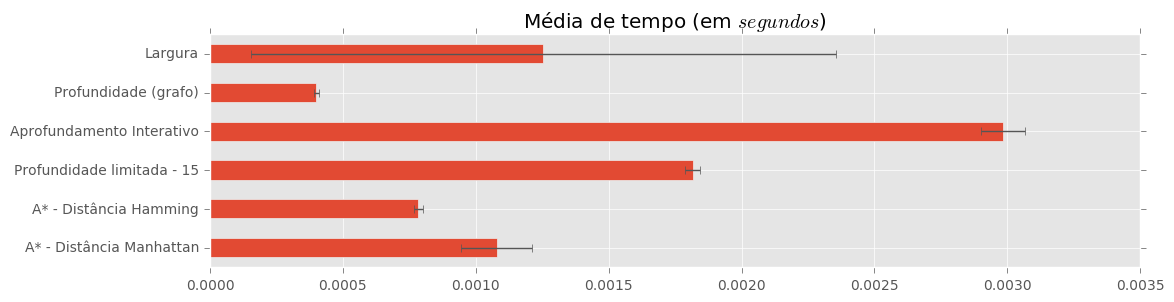

In [7]:
data = helper.carregar_json('data.json')
resultado_2_x_2 = helper.processar_resultados(data['(2, 2)'])
helper.grafico_desvio_padrao(resultado_2_x_2[0], figsize=(12, 3))

resultado_2_x_2[1]

### 3.2 Tamanho: (2, 3)

* **Estado inicial**:
```
[[5 2]
 [4 3]
 [0 1]]
```
* **Mínimo de movimentos para solucionar**: 14

,A* - Distância Manhattan,A* - Distância Hamming,Profundidade limitada - 15,Aprofundamento Interativo,Profundidade (grafo),Largura
0,14,14,14,14,118,14


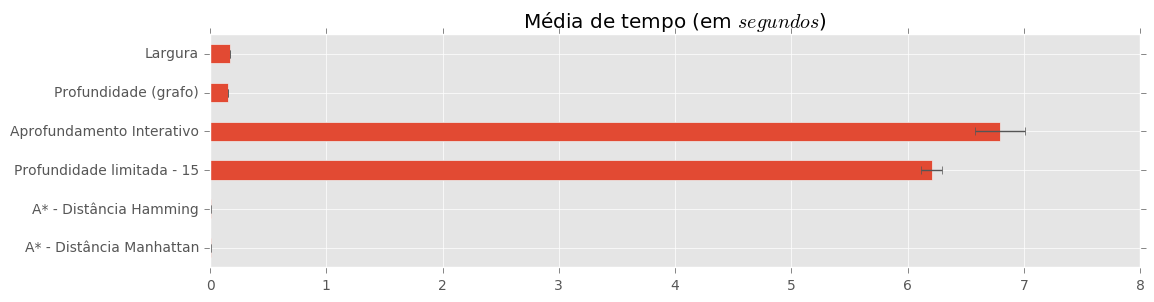

In [8]:
resultado_2_x_3 = helper.processar_resultados(data['(2, 3)'])
helper.grafico_desvio_padrao(resultado_2_x_3[0], figsize=(12, 3))

resultado_2_x_3[1]

### 3.3 Tamanho: (3, 3)

* **Estado inicial**:
```
[[2 6 3]
 [5 1 8]
 [0 4 7]]
```
* **Mínimo de movimentos para solucionar**: 24

,A* - Distância Manhattan,A* - Distância Hamming
0,24,24


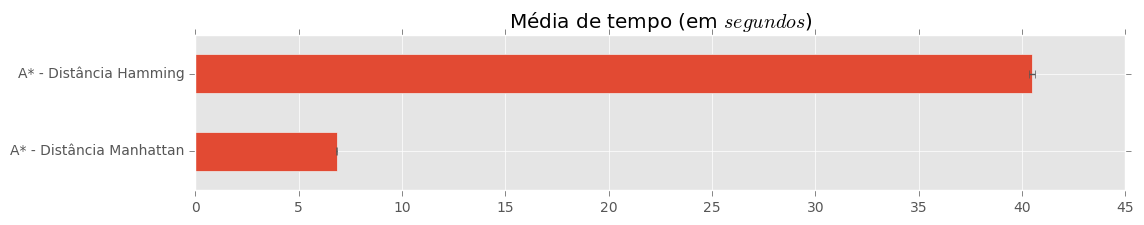

In [4]:
resultado_3_x_3 = helper.processar_resultados(data['(3, 3)'])
helper.grafico_desvio_padrao(resultado_3_x_3[0], figsize=(12, 2))

resultado_3_x_3[1]

### 3.4 Tamanho: (3, 4)

* **Estado inicial**:
```
[[ 5  7 11]
 [ 4 10  2]
 [ 3  1  0]
 [ 6  8  9]]
```
* **Mínimo de movimentos para solucionar**: 32

,A* - Distância Manhattan,A* - Distância Hamming
0,32,32


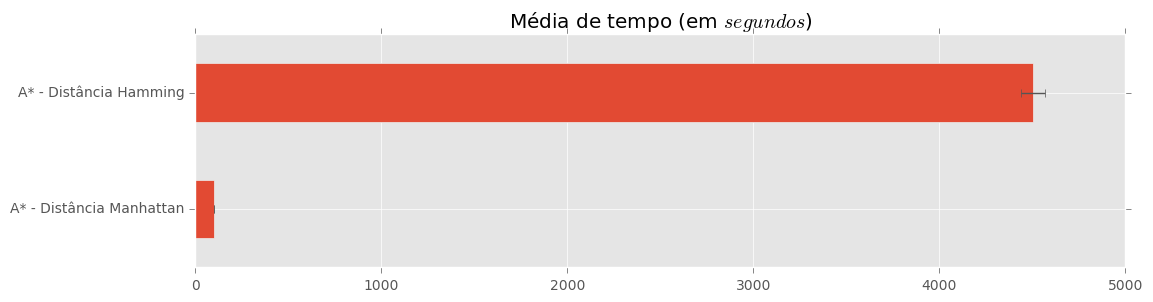

In [5]:
resultado_3_x_4 = helper.processar_resultados(data['(3, 4)'])
helper.grafico_desvio_padrao(resultado_3_x_4[0], figsize=(12, 3))

resultado_3_x_4[1]

## 3.5 Análise Manhattan

A partir de uma solução com $n$ passos, é possível obter $m = n+1$ estados com $0,1,2,3..n$ passos necessários para solucionar o problema.
Para cada um dos $m$ estado, foi realizada 10 (dez) execuções _A\* - Heurística Distância Manhattan_. O gráfico a seguir apresenta a média dos resultados:

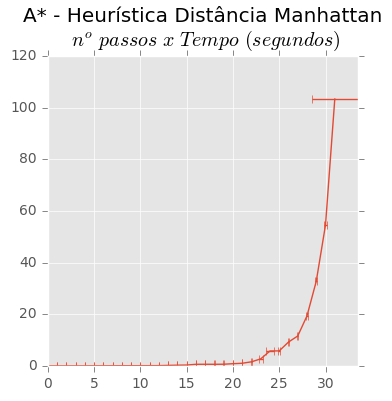

In [6]:
data_quarteirao = helper.carregar_json('astar-quarteirao-analise.json')

analise = helper.processar_resultados_crescente(data_quarteirao)
helper.grafico_desvio_padrao(analise, kind='line', title='A* - Heurística Distância Manhattan\n $n^o\ passos\ x\ Tempo\ (segundos)$', figsize=(4, 4))

## 4. Discussão e conclusões

Como esperado, a utilização de algorítmos de busca com informação para melhor seleção dos próximos nós a expandir trouxe resultados melhores que algoritmos de busca com sem informação. A partir de um quebra cabeças de tamanho $2x3$, já foi apresentado uma diferença significativa entre os algoritmos sem e com informação.

A partir do quebra cabeças de 8 peças ($3x3$), o tempo de execução de busca sem informação foi significativamente grande, a ponto de desconsiderar da análise.

Comparando as heurísticas utilizadas para o algorítmo A\*, a distância Manhattan demonstrou ser mais performático que a distância Hamming: Uma solução de 32 passos necessitava de cerca de **uma hora** para o _Hamming_ e cerca de três minutos para a distância **Manhattan**.

No gráfico $n^o\ passos\ x\ Tempo$ para _A\* - Manhattan_, é possível perceber um crescimento semelhante à uma função exponencial. 


## 5. Referências

\_\_\_\_\_\_\_. ["8 Puzzle"](http://www.cs.princeton.edu/courses/archive/spring09/cos226/assignments/8puzzle.html). Computer Science 226, Algorithms and Data Structures, Spring 2009. Acessado em 16 de abril 

Parberry, I (1995). "A Real-Time Algorithm for the $(n^2 − 1)$-puzzle". Information Processing Letters



